# Classificação KNN

O KNN é um dos algorítmos para Machine Learning, sendo um algorítmo do tipo "lazy", ou seja, nenhuma computação é realizada no dataset até que um novo ponto de dado seja alvo de teste

Veremos agora não apenas o KNN, mas também a influência das dimensões em processos de classificação. Utilizaremos o dataset de dígitos fornecido pelo Scikit-Learn.

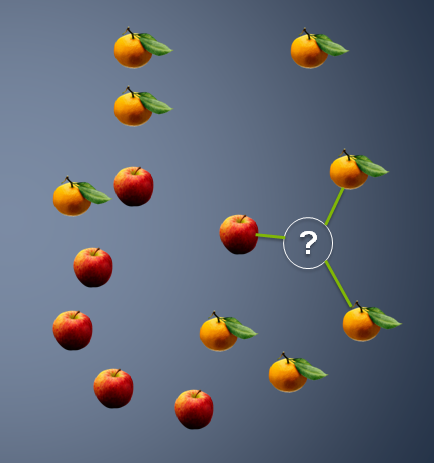

In [1]:
from IPython.display import Image
Image('./images/frutas1.png')

In [2]:
# Carrega os pacotes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
from sklearn.decomposition import TruncatedSVD
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold, train_test_split, GridSearchCV

In [3]:
# Gera o dataset
digitos = sklearn.datasets.load_digits()

<Figure size 432x288 with 0 Axes>

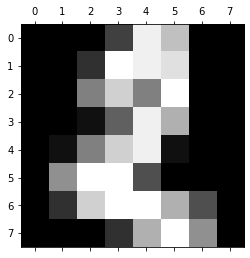

In [4]:
# Plot de um dos itens do dataset
plt.gray() 
plt.matshow(digitos.images[2]) 
plt.show() 

In [5]:
# Gera x e y
x = digitos.data
y = digitos.target

In [6]:
print(x.shape, y.shape)

(1797, 64) (1797,)


In [7]:
# Cross Validation para gerar os datasets de treino e de teste
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y,
                                                       test_size = 0.33,
                                                       random_state = 101)

In [8]:
# Normalização dos dados pela Média

# Cálculo da média do dataset de treino
x_norm = np.mean(x_treino, axis = 0)

# Normalização dos dados de treino e de teste
x_treino_norm = x_treino - x_norm
x_teste_norm = x_teste - x_norm

In [9]:
# Shape dos datasets
print(x_treino_norm.shape, x_teste_norm.shape, y_treino.shape, y_teste.shape)

(1203, 64) (594, 64) (1203,) (594,)


In [10]:
# Single Value Decomposition (SVD) - Redução de Dimensionalidade
# Redução de Componentes Linear, similar ao PCA
svd = sklearn.decomposition.TruncatedSVD(n_components = 2)
x_2d = svd.fit_transform(x_treino_norm)

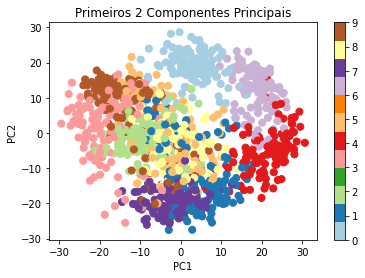

In [11]:
# Plot dos 2 primeiros Componentes Principais
plt.scatter(x_2d[:, 0], x_2d[:, 1], c = y_treino, s = 50, cmap = plt.cm.Paired)
plt.colorbar()
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Primeiros 2 Componentes Principais')
plt.show()

In [12]:
# Função para testar o melhor valor de K
def compute_teste(x_teste, y_teste, clf, cv):
    KFolds = KFold(n_splits = cv)
    
    scores = []
    
    for i, j in KFolds.split(x_teste):
        test_set = x_teste[j]
        test_labels = y_teste[j]
        scores.append(accuracy_score(test_labels, clf.predict(test_set)))
    return scores

In [13]:
# Definição de parâmetros
k = np.arange(20) + 1
parametros = { 'n_neighbors': k }

In [14]:
# Construção do Modelo KNN
modelo = KNeighborsClassifier()

In [15]:
modelo.get_params

<bound method BaseEstimator.get_params of KNeighborsClassifier()>

In [16]:
# Grid Search para Cross Validation com o melhor valor de K
modeloKNN = GridSearchCV(modelo, parametros, cv = 10)

In [17]:
modeloKNN.get_params

<bound method BaseEstimator.get_params of GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])})>

In [18]:
# Listas vazias que vão receber os scores de acurácia e os parâmetros resultados do modelo
acuracia = []
params = []

In [19]:
# Lista de dimensões
dimensoes = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [20]:
# Implementação do modelo
for d in dimensoes:
    svd = TruncatedSVD(n_components = d)
    
    if d < 64:
        x_fit_treino = svd.fit_transform(x_treino)
        x_fit_teste = svd.transform(x_teste)
    else:
        x_nl = x_treino
        x_nl1 = x_teste
        
    modeloKNN.fit(x_fit_treino, y_treino)
    
    acuracia.append(compute_teste(x_teste = x_fit_teste, y_teste = y_teste, clf = modeloKNN, cv = 10))
    params.append(modeloKNN.best_params_['n_neighbors'])

In [21]:
# A acurácia aumenta a medida que usamos mais dimensões para o modelo de classificação
acuracia

[[0.18333333333333332,
  0.08333333333333333,
  0.16666666666666666,
  0.13333333333333333,
  0.1864406779661017,
  0.1016949152542373,
  0.13559322033898305,
  0.1016949152542373,
  0.06779661016949153,
  0.15254237288135594],
 [0.48333333333333334,
  0.4,
  0.4166666666666667,
  0.31666666666666665,
  0.3898305084745763,
  0.4067796610169492,
  0.4406779661016949,
  0.5423728813559322,
  0.3050847457627119,
  0.3898305084745763],
 [0.6833333333333333,
  0.7,
  0.6,
  0.65,
  0.6440677966101694,
  0.6271186440677966,
  0.7627118644067796,
  0.6610169491525424,
  0.5932203389830508,
  0.6610169491525424],
 [0.8166666666666667,
  0.8166666666666667,
  0.75,
  0.7666666666666667,
  0.7627118644067796,
  0.7288135593220338,
  0.864406779661017,
  0.847457627118644,
  0.6949152542372882,
  0.8135593220338984],
 [0.9166666666666666,
  0.85,
  0.85,
  0.8333333333333334,
  0.7966101694915254,
  0.8135593220338984,
  0.9152542372881356,
  0.864406779661017,
  0.7627118644067796,
  0.966101694